In [52]:

import numpy as np
import pandas as pd

def generate_supervised_mixed_dataframe(num_samples, num_numerical_features, num_categorical_features, num_categories_per_feature=3, numerical_mean=0, numerical_std=1, seed=None):
    """
    Generate a synthetic supervised dataframe with mixed numerical and categorical features.

    Parameters:
    - num_samples (int): Number of samples in the dataframe.
    - num_numerical_features (int): Number of numerical features in the dataframe.
    - num_categorical_features (int): Number of categorical features in the dataframe.
    - num_categories_per_feature (int, optional): Number of categories per categorical feature. Default is 3.
    - numerical_mean (float or array-like, optional): Mean of the normal distribution for numerical features. Default is 0.
    - numerical_std (float or array-like, optional): Standard deviation of the normal distribution for numerical features. Default is 1.
    - seed (int or None, optional): Seed for random number generation. Default is None.

    Returns:
    - df (pandas.DataFrame): Synthetic dataframe with mixed numerical and categorical features and labels.
    """
    # Validate input parameters
    if not isinstance(num_samples, int) or num_samples <= 0:
        raise ValueError("num_samples must be a positive integer.")
    if not isinstance(num_numerical_features, int) or num_numerical_features <= 0:
        raise ValueError("num_numerical_features must be a positive integer.")
    if not isinstance(num_categorical_features, int) or num_categorical_features <= 0:
        raise ValueError("num_categorical_features must be a positive integer.")
    if not isinstance(num_categories_per_feature, int) or num_categories_per_feature <= 0:
        raise ValueError("num_categories_per_feature must be a positive integer.")
    if not isinstance(numerical_mean, (int, float)) and not isinstance(numerical_mean, (list, np.ndarray)):
        raise ValueError("numerical_mean must be a single value or an array-like object.")
    if not isinstance(numerical_std, (int, float)) and not isinstance(numerical_std, (list, np.ndarray)):
        raise ValueError("numerical_std must be a single value or an array-like object.")

    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic numerical features
    numerical_features_data = np.random.normal(loc=numerical_mean, scale=numerical_std, size=(num_samples, num_numerical_features))
    
    # Generate synthetic categorical features
    categorical_features_data = np.random.randint(num_categories_per_feature, size=(num_samples, num_categorical_features))
    
    # Combine numerical and categorical features
    features_data = np.concatenate((numerical_features_data, categorical_features_data), axis=1)
    
    # Generate synthetic labels/targets
    labels = np.random.randint(2, size=num_samples)  # Binary classification labels (0 or 1)
    
    # Create dataframe
    numerical_column_names = [f"numerical_feature_{i+1}" for i in range(num_numerical_features)]
    categorical_column_names = [f"categorical_feature_{i+1}" for i in range(num_categorical_features)]
    column_names = numerical_column_names + categorical_column_names + ["label"]
    df = pd.DataFrame(np.column_stack([features_data, labels]), columns=column_names)
    
    return df



In [53]:
generate_supervised_mixed_dataframe(7, 6, 6, num_categories_per_feature=10, numerical_mean=0, numerical_std=1, seed=0)

,numerical_feature_1,numerical_feature_2,numerical_feature_3,numerical_feature_4,numerical_feature_5,numerical_feature_6,categorical_feature_1,categorical_feature_2,categorical_feature_3,categorical_feature_4,categorical_feature_5,categorical_feature_6,label
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,9.0,4.0,4.0,6.0,4.0,4.0,0.0
1,0.950088,-0.151357,-0.103219,0.410599,0.144044,1.454274,3.0,4.0,4.0,8.0,4.0,3.0,0.0
2,0.761038,0.121675,0.443863,0.333674,1.494079,-0.205158,7.0,5.0,5.0,0.0,1.0,5.0,1.0
3,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165,9.0,3.0,0.0,5.0,0.0,1.0,0.0
4,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359,2.0,4.0,2.0,0.0,3.0,2.0,1.0
5,0.154947,0.378163,-0.887786,-1.980796,-0.347912,0.156349,0.0,7.0,5.0,9.0,0.0,2.0,0.0
6,1.230291,1.202380,-0.387327,-0.302303,-1.048553,-1.420018,7.0,2.0,9.0,2.0,3.0,3.0,1.0


In [54]:
def generate_unsupervised_numerical_dataframe(num_samples, num_features, mean=0, std=1, seed=None):
    """
    Generate a synthetic unsupervised numerical dataframe.

    Parameters:
    - num_samples (int): Number of samples in the dataframe.
    - num_features (int): Number of numerical features in the dataframe.
    - mean (float or array-like, optional): Mean of the normal distribution. Default is 0.
    - std (float or array-like, optional): Standard deviation of the normal distribution. Default is 1.
    - seed (int or None, optional): Seed for random number generation. Default is None.

    Returns:
    - df (pandas.DataFrame): Synthetic dataframe with numerical features.
    """
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic numerical features
    features_data = np.random.normal(loc=mean, scale=std, size=(num_samples, num_features))
    
    # Create dataframe
    column_names = [f"feature_{i+1}" for i in range(num_features)]
    df = pd.DataFrame(features_data, columns=column_names)
    
    return df


In [55]:
generate_unsupervised_numerical_dataframe(5, 3, mean=0, std=1, seed=0)

,feature_1,feature_2,feature_3
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219
3,0.410599,0.144044,1.454274
4,0.761038,0.121675,0.443863


In [56]:
import numpy as np
import matplotlib.pyplot as plt 
def generate_correlated_features(num_samples, num_features, correlation_strength=0.5, seed=None):
    """
    Generate synthetic correlated numerical features.

    Parameters:
    - num_samples (int): Number of samples in the dataset.
    - num_features (int): Number of numerical features.
    - correlation_strength (float, optional): Strength of correlation between features (between -1 and 1). Default is 0.5.
    - seed (int or None, optional): Seed for random number generation. Default is None.

    Returns:
    - features (numpy.ndarray): Synthetic numerical features with correlation.
    """
    # Validate input parameters
    if not isinstance(num_samples, int) or num_samples <= 0:
        raise ValueError("num_samples must be a positive integer.")
    if not isinstance(num_features, int) or num_features <= 0:
        raise ValueError("num_features must be a positive integer.")
    if not -1 <= correlation_strength <= 1:
        raise ValueError("correlation_strength must be between -1 and 1.")

    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic correlated features
    features = np.random.randn(num_samples, num_features)
    
    # Implement correlation
    if correlation_strength != 0:
        correlation_matrix = np.eye(num_features) + correlation_strength * np.ones((num_features, num_features))
        cholesky_matrix = np.linalg.cholesky(correlation_matrix)
        features = features @ cholesky_matrix
    
    
    df = pd.DataFrame(features)
    return df 

In [57]:
df= generate_correlated_features(8,9, correlation_strength=0.5, seed=0)
df

,0,1,2,3,4,5,6,7,8
0,4.285684,1.849268,1.949935,2.744300,1.973716,-0.951812,0.977719,-0.170425,-0.108257
1,2.359383,1.437492,2.285382,1.233172,0.450285,0.691338,0.505816,1.553272,-0.215172
2,-0.339191,-1.250638,-2.488277,0.895550,0.952057,-0.678332,2.241432,-1.528213,0.047992
3,-0.035293,1.464576,1.077731,-0.319924,-0.063728,-1.239377,-2.123528,-0.350251,0.163980
4,0.600086,0.400153,-1.111919,-0.830262,-1.392593,-1.553495,-1.639935,2.002576,-0.534528
5,-2.374440,-2.384552,-0.031123,-2.208441,-0.569253,-1.131620,0.211034,-0.662885,-1.238257
6,-0.869344,-0.219366,-0.493537,-0.187575,-1.025833,-0.634356,-0.851456,-0.464715,-0.852835
7,-2.681333,-0.247329,-0.709639,-1.700804,0.500282,-0.848336,0.156221,0.782125,0.135278


In [58]:
def generate_outliers(num_samples, num_features, num_outliers, outlier_strength=10, seed=None):
    """
    Generate synthetic outliers in a dataset.

    Parameters:
    - num_samples (int): Number of samples in the dataset.
    - num_features (int): Number of numerical features.
    - num_outliers (int): Number of outliers to generate.
    - outlier_strength (float, optional): Strength of the outliers. Default is 10.
    - seed (int or None, optional): Seed for random number generation. Default is None.

    Returns:
    - df (pandas.DataFrame): Synthetic dataset with outliers.
    """
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic dataset
    df = generate_unsupervised_numerical_dataframe(num_samples, num_features, seed=seed)
    
    # Generate random indices for outliers
    outlier_indices = np.random.choice(num_samples, num_outliers, replace=False)
    
    # Generate outliers
    for i in range(num_features):
        df.iloc[outlier_indices, i] += np.random.randn(num_outliers) * outlier_strength
    
    return df

In [59]:
generate_outliers(5, 3, 2, outlier_strength=10, seed=0)

,feature_1,feature_2,feature_3
0,1.764052,0.400157,0.978738
1,17.181684,4.998235,-26.507176
2,0.950088,-0.151357,-0.103219
3,0.410599,0.144044,1.454274
4,4.097781,-1.929908,-8.097094


In [60]:
import numpy as np
import pandas as pd

def generate_supervised_numerical_dataframe(num_samples, num_features, mean=0, std=1, seed=None):
    """
    Generate a synthetic supervised numerical dataframe.

    Parameters:
    - num_samples (int): Number of samples in the dataframe.
    - num_features (int): Number of numerical features in the dataframe.
    - mean (float or array-like, optional): Mean of the normal distribution. Default is 0.
    - std (float or array-like, optional): Standard deviation of the normal distribution. Default is 1.
    - seed (int or None, optional): Seed for random number generation. Default is None.

    Returns:
    - df (pandas.DataFrame): Synthetic dataframe with numerical features and labels.
    """
    # Validate input parameters
    if not isinstance(num_samples, int) or num_samples <= 0:
        raise ValueError("num_samples must be a positive integer.")
    if not isinstance(num_features, int) or num_features <= 0:
        raise ValueError("num_features must be a positive integer.")
    if not isinstance(mean, (int, float)) and not isinstance(mean, (list, np.ndarray)):
        raise ValueError("mean must be a single value or an array-like object.")
    if not isinstance(std, (int, float)) and not isinstance(std, (list, np.ndarray)):
        raise ValueError("std must be a single value or an array-like object.")

    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Generate synthetic numerical features
    features_data = np.random.normal(loc=mean, scale=std, size=(num_samples, num_features))
    
    # Generate synthetic labels/targets
    labels = np.random.randint(2, size=num_samples)  # Binary classification labels (0 or 1)
    
    # Create dataframe
    column_names = [f"feature_{i+1}" for i in range(num_features)]
    column_names.append("label")
    df = pd.DataFrame(np.column_stack([features_data, labels]), columns=column_names)
    
    return df


generate_supervised_numerical_dataframe(7,4
, mean=0, std=1, seed=0)

,feature_1,feature_2,feature_3,feature_4,label
0,1.764052,0.400157,0.978738,2.240893,0.0
1,1.867558,-0.977278,0.950088,-0.151357,0.0
2,-0.103219,0.410599,0.144044,1.454274,0.0
3,0.761038,0.121675,0.443863,0.333674,1.0
4,1.494079,-0.205158,0.313068,-0.854096,1.0
5,-2.552990,0.653619,0.864436,-0.742165,0.0
6,2.269755,-1.454366,0.045759,-0.187184,1.0


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation(df):
    """
    Plot correlation heatmap for the features in the dataframe.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing the features.

    Returns:
    - None
    """
    # Compute correlation matrix
    corr_matrix = df.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Plot')
    plt.show()

def plot_distribution(df):
    """
    Plot distribution of each feature in the dataframe.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing the features.

    Returns:
    - None
    """
    # Plot distribution
    plt.figure(figsize=(15, 10))
    for column in df.columns:
        if column != 'label':  # Exclude label column from distribution plot
            sns.histplot(df[column], kde=True, label=column, alpha=0.5)
    plt.title('Distribution Plot')
    plt.legend()
    plt.show()


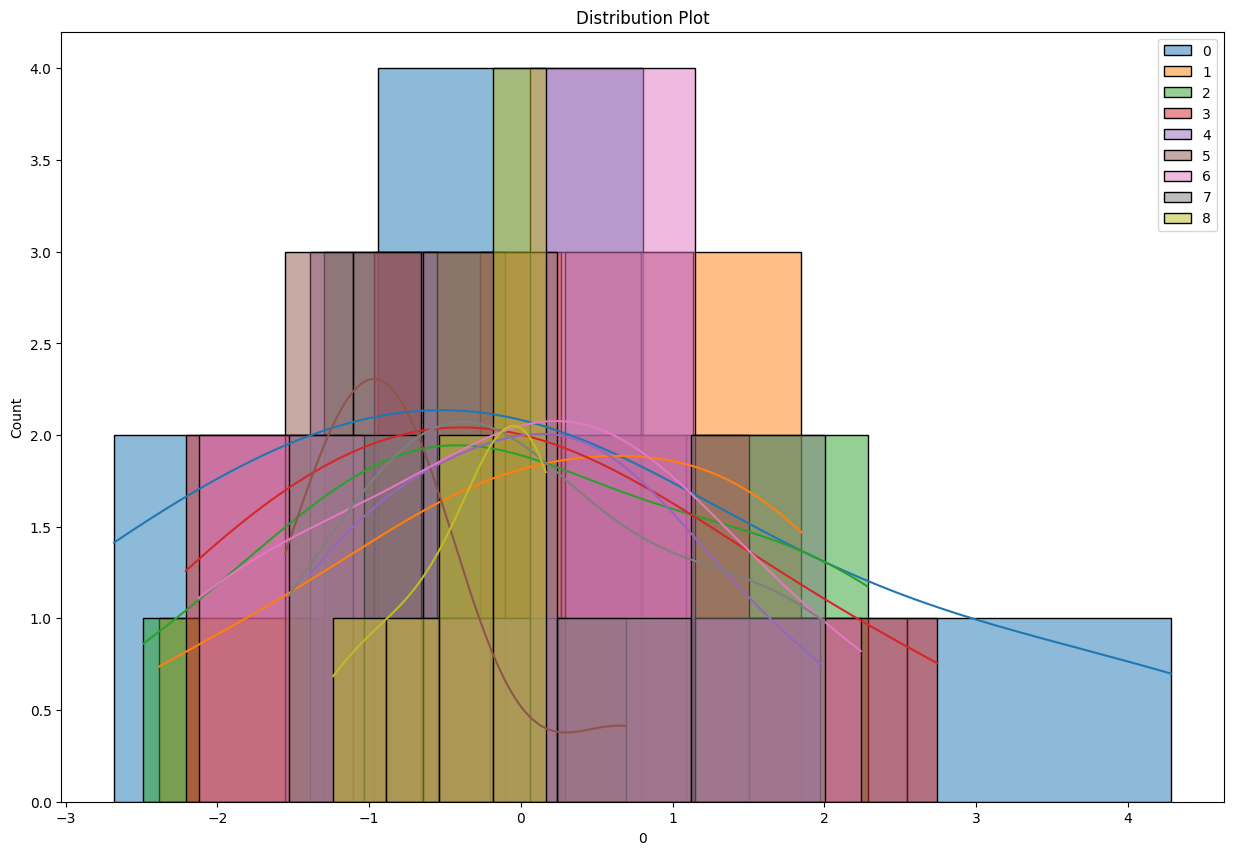

In [62]:
plot_distribution(df)

In [63]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def apply_smote(df, target_column):
    """
    Apply SMOTE (Synthetic Minority Over-sampling Technique) to the dataframe to address class imbalance.

    Parameters:
    - df (pandas.DataFrame): DataFrame containing features and labels.
    - target_column (str): Name of the column containing the target variable.

    Returns:
    - augmented_df (pandas.DataFrame or None): DataFrame with augmented samples, or None if the dataset is too small.
    """
    # Separate features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Check if the dataset is large enough for SMOTE
    if len(X) < 6:
        print("Dataset is too small for SMOTE. Returning original dataframe.")
        return None
    
    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    # Combine resampled features and target variable
    augmented_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    
    return augmented_df
